You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

Downloaded thinkpython.py
Downloaded diagram.py


# Return Values

In previous chapters, we've used built-in functions -- like `abs` and `round` -- and functions in the math module -- like `sqrt` and `pow`.
When you call one of these functions, it returns a value you can assign to a variable or use as part of an expression.

The functions we have written so far are different.
Some use the `print` function to display values, and some use turtle functions to draw figures.
But they don't return values we assign to variables or use in expressions.

In this chapter, we'll see how to write functions that return values.

## Some functions have return values

When you call a function like `math.sqrt`, the result is called a **return value**.
If the function call appears at the end of a cell, Jupyter displays the return value immediately.

In [2]:
import math

math.sqrt(42 / math.pi)

3.656366395715726

If you assign the return value to a variable, it doesn't get displayed.

In [3]:
radius = math.sqrt(42 / math.pi)

But you can display it later.

In [ ]:
radius

Or you can use the return value as part of an expression.

In [ ]:
radius + math.sqrt(42 / math.pi)

Here's an example of a function that returns a value.

In [ ]:
def circle_area(radius):
    area = math.pi * radius**2
    return area

`circle_area` takes `radius` as a parameter and computes the area of a circle with that radius.

The last line is a `return` statement that returns the value of `area`.

If we call the function like this, Jupyter displays the return value.


In [ ]:
circle_area(radius)

We can assign the return value to a variable.

In [ ]:
a = circle_area(radius)

Or use it as part of an expression.

In [ ]:
circle_area(radius) + 2 * circle_area(radius / 2)

Later we can display the value of the variable we assigned the result to.

In [ ]:
a

But we can't access `area`.

In [ ]:
%%expect NameError

area

`area` is a local variable in a function, so we can't access it from outside the function.

## And some have None

If a function doesn't have a `return` statement, it returns `None`, which is a special value like `True` and `False`.
For example, here's the `repeat` function from Chapter 3.

In [ ]:
def repeat(word, n):
    print(word * n)

If we call it like this, it displays the first line of the Monty Python song "Finland".

In [ ]:
repeat('Finland, ', 3)

This function uses the `print` function to display a string, but it does not use a `return` statement to return a value.
If we assign the result to a variable, it displays the string anyway.

In [ ]:
result = repeat('Finland, ', 3)

And if we display the value of the variable, we get nothing.

In [ ]:
result

`result` actually has a value, but Jupyter doesn't show it.
However, we can display it like this.

In [ ]:
print(result)

The return value from `repeat` is `None`.

Now here's a function similar to `repeat` except that has a return value.

In [ ]:
def repeat_string(word, n):
    return word * n

Notice that we can use an expression in a `return` statement, not just a variable.

With this version, we can assign the result to a variable.
When the function runs, it doesn't display anything.

In [ ]:
line = repeat_string('Spam, ', 4)

But later we can display the value assigned to `line`.

In [ ]:
line

A function like this is called a **pure function** because it doesn't display anything or have any other effect -- other than returning a value.

## Return values and conditionals

If Python did not provide `abs`, we could write it like this.

In [ ]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

If `x` is negative, the first `return` statement returns `-x` and the function ends immediately.
Otherwise, the second `return` statement returns `x` and the function ends.
So this function is correct.

However, if you put `return` statements in a conditional, you have to make sure that every possible path through the program hits a `return` statement.
For example, here's an incorrect version of `absolute_value`.

In [ ]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

Here's what happens if we call this function with `0` as an argument.

In [ ]:
absolute_value_wrong(0)

We get nothing! Here's the problem: when `x` is `0`, neither condition is true, and the function ends without hitting a `return` statement, which means that the return value is `None`, so Jupyter displays nothing.

As another example, here's a version of `absolute_value` with an extra `return` statement at the end.

In [ ]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x

    return 'This is dead code'

If `x` is negative, the first `return` statement runs and the function ends.
Otherwise the second `return` statement runs and the function ends.
Either way, we never get to the third `return` statement -- so it can never run.

Code that can never run is called **dead code**.
In general, dead code doesn't do any harm, but it often indicates a misunderstanding, and it might be confusing to someone trying to understand the program.

## Incremental development

As you write larger functions, you might find yourself spending more
time debugging.
To deal with increasingly complex programs, you might want to try **incremental development**, which is a way of adding and testing only a small amount of code at a time.

As an example, suppose you want to find the distance between two points represented by the coordinates $(x_1, y_1)$ and $(x_2, y_2)$.
By the Pythagorean theorem, the distance is:

$$\mathrm{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

The first step is to consider what a `distance` function should look like in Python -- that is, what are the inputs (parameters) and what is the output (return value)?

For this function, the inputs are the coordinates of the points.
The return value is the distance.
Immediately you can write an outline of the function:

In [ ]:
def distance(x1, y1, x2, y2):
    return 0.0

This version doesn't compute distances yet -- it always returns zero.
But it is a complete function with a return value, which means that you can test it before you make it more complicated.

To test the new function, we'll call it with sample arguments:

In [ ]:
distance(1, 2, 4, 6)

I chose these values so that the horizontal distance is `3` and the
vertical distance is `4`.
That way, the result is `5`, the hypotenuse of a `3-4-5` right triangle. When testing a function, it is useful to know the right answer.

At this point we have confirmed that the function runs and returns a value, and we can start adding code to the body.
A good next step is to find the differences `x2 - x1` and `y2 - y1`.
Here's a version that stores those values in temporary variables and displays them.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('dx is', dx)
    print('dy is', dy)
    return 0.0

If the function is working, it should display `dx is 3` and `dy is 4`.
If so, we know that the function is getting the right arguments and
performing the first computation correctly. If not, there are only a few
lines to check.

In [ ]:
distance(1, 2, 4, 6)

Good so far. Next we compute the sum of squares of `dx` and `dy`:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    print('dsquared is: ', dsquared)
    return 0.0

Again, we can run the function and check the output, which should be `25`.

In [ ]:
distance(1, 2, 4, 6)

Finally, we can use `math.sqrt` to compute the distance:

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    print("result is", result)

And test it.

In [ ]:
distance(1, 2, 4, 6)

The result is correct, but this version of the function displays the result rather than returning it, so the return value is `None`.

We can fix that by replacing the `print` function with a `return` statement.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

This version of `distance` is a pure function.
If we call it like this, only the result is displayed.

In [ ]:
distance(1, 2, 4, 6)

And if we assign the result to a variable, nothing is displayed.

In [ ]:
d = distance(1, 2, 4, 6)

The `print` statements we wrote are useful for debugging, but once the function is working, we can remove them.
Code like that is called **scaffolding** because it is helpful for building the program but is not part of the final product.

This example demonstrates incremental development.
The key aspects of this process are:

1.  Start with a working program, make small changes, and test after every change.

2.  Use variables to hold intermediate values so you can display and check them.

3.  Once the program is working, remove the scaffolding.

At any point, if there is an error, you should have a good idea where it is.
Incremental development can save you a lot of debugging time.

## Boolean functions

Functions can return the boolean values `True` and `False`, which is often convenient for encapsulating a complex test in a function.
For example, `is_divisible` checks whether `x` is divisible by `y` with no remainder.

In [ ]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

Here's how we use it.

In [ ]:
is_divisible(6, 4)

In [ ]:
is_divisible(6, 3)

Inside the function, the result of the `==` operator is a boolean, so we can write the
function more concisely by returning it directly.

In [ ]:
def is_divisible(x, y):
    return x % y == 0

Boolean functions are often used in conditional statements.

In [ ]:
if is_divisible(6, 2):
    print('divisible')

It might be tempting to write something like this:

In [ ]:
if is_divisible(6, 2) == True:
    print('divisible')

But the comparison is unnecessary.

## Recursion with return values

Now that we can write functions with return values, we can write recursive functions with return values, and with that capability, we have passed an important threshold -- the subset of Python we have is now **Turing complete**, which means that we can perform any computation that can be described by an algorithm.

To demonstrate recursion with return values, we'll evaluate a few recursively defined mathematical functions.
A recursive definition is similar to a circular definition, in the sense that the definition refers to the thing being defined. A truly circular definition is not very useful:

> vorpal: An adjective used to describe something that is vorpal.

If you saw that definition in the dictionary, you might be annoyed.
On the other hand, if you looked up the definition of the factorial function, denoted with the symbol $!$, you might get something like this:

$$\begin{aligned}
0! &= 1 \\
n! &= n~(n-1)!
\end{aligned}$$

This definition says that the factorial of $0$ is $1$, and the factorial of any other value, $n$, is $n$ multiplied by the factorial of $n-1$.

If you can write a recursive definition of something, you can write a Python program to evaluate it.
Following an incremental development process, we'll start with a function that take `n` as a parameter and always returns `0`.

In [ ]:
def factorial(n):
    return 0

Now let's add the first part of the definition -- if the argument happens to be `0`, all we have to do is return `1`:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return 0

Now let's fill in the second part -- if `n` is not `0`, we have to make a recursive
call to find the factorial of `n-1` and then multiply the result by `n`:

In [8]:
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        return n * recurse

The flow of execution for this program is similar to the flow of `countdown` in Chapter 5.
If we call `factorial` with the value `3`:

Since `3` is not `0`, we take the second branch and calculate the factorial
of `n-1`\...

> Since `2` is not `0`, we take the second branch and calculate the
> factorial of `n-1`\...
>
> > Since `1` is not `0`, we take the second branch and calculate the
> > factorial of `n-1`\...
> >
> > > Since `0` equals `0`, we take the first branch and return `1` without
> > > making any more recursive calls.
> >
> > The return value, `1`, is multiplied by `n`, which is `1`, and the
> > result is returned.
>
> The return value, `1`, is multiplied by `n`, which is `2`, and the result
> is returned.

The return value `2` is multiplied by `n`, which is `3`, and the result,
`6`, becomes the return value of the function call that started the whole
process.

The following figure shows the stack diagram for this sequence of function calls.

In [4]:
from diagram import Frame, Stack, make_binding

main = Frame([], name='__main__', loc='left')
frames = [main]

ns = 3, 2, 1
recurses = 2, 1, 1
results = 6, 2, 1

for n, recurse, result in zip(ns, recurses, results):
    binding1 = make_binding('n', n)
    binding2 = make_binding('recurse', recurse)
    frame = Frame([binding1, binding2],
                  name='factorial', value=result,
                  loc='left', dx=1.2)
    frames.append(frame)

binding1 = make_binding('n', 0)
frame = Frame([binding1], name='factorial', value=1,
              shim=1.2, loc='left', dx=1.4)
frames.append(frame)

stack = Stack(frames, dy=-0.45)

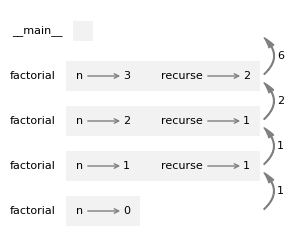

In [5]:
from diagram import diagram, adjust

width, height, x, y = [2.74, 2.26, 0.73, 2.05]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

The return values are shown being passed back up the stack.
In each frame, the return value is the product of `n` and `recurse`.

In the last frame, the local variable `recurse` does not exist because the branch that creates it does not run.

## Leap of faith

Following the flow of execution is one way to read programs, but it can quickly become overwhelming. An alternative is what I call the "leap of faith". When you come to a function call, instead of following the flow of execution, you *assume* that the function works correctly and returns the right result.

In fact, you are already practicing this leap of faith when you use built-in functions.
When you call `abs` or `math.sqrt`, you don't examine the bodies of those functions -- you just assume that they work.

The same is true when you call one of your own functions. For example, earlier we wrote a function called `is_divisible` that determines whether one number is divisible by another. Once we convince ourselves that this function is correct, we can use it without looking at the body again.

The same is true of recursive programs.
When you get to the recursive call, instead of following the flow of execution, you should assume that the recursive call works and then ask yourself, "Assuming that I can compute the factorial of $n-1$, can I compute the factorial of $n$?"
The recursive definition of factorial implies that you can, by multiplying by $n$.

Of course, it's a bit strange to assume that the function works correctly when you haven't finished writing it, but that's why it's called a leap of faith!

## Fibonacci

After `factorial`, the most common example of a recursive function is `fibonacci`, which has the following definition:

$$\begin{aligned}
\mathrm{fibonacci}(0) &= 0 \\
\mathrm{fibonacci}(1) &= 1 \\
\mathrm{fibonacci}(n) &= \mathrm{fibonacci}(n-1) + \mathrm{fibonacci}(n-2)
\end{aligned}$$

Translated into Python, it looks like this:

In [7]:
def fibonacci(n):
    if n == 0:
        return 0
    elif  n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

If you try to follow the flow of execution here, even for small values of $n$, your head explodes.
But according to the leap of faith, if you assume that the two recursive calls work correctly, you can be confident that the last `return` statement is correct.

As an aside, this way of computing Fibonacci numbers is very inefficient.
In [Chapter 10](section_memos) I'll explain why and suggest a way to improve it.

## Checking types

What happens if we call `factorial` and give it `1.5` as an argument?

In [9]:
%%expect RecursionError

factorial(1.5)

RecursionError: maximum recursion depth exceeded in comparison

It looks like an infinite recursion. How can that be? The function has base cases when `n == 1` or `n == 0`.
But if `n` is not an integer, we can *miss* the base case and recurse forever.

In this example, the initial value of `n` is `1.5`.
In the first recursive call, the value of `n` is `0.5`.
In the next, it is `-0.5`.
From there, it gets smaller (more negative), but it will never be `0`.

To avoid infinite recursion we can use the built-in function `isinstance` to check the type of the argument.
Here's how we check whether a value is an integer.

In [ ]:
isinstance(3, int)

In [ ]:
isinstance(1.5, int)

Now here's a version of `factorial` with error-checking.

In [ ]:
def factorial(n):
    if not isinstance(n, int):
        print('factorial is only defined for integers.')
        return None
    elif n < 0:
        print('factorial is not defined for negative numbers.')
        return None
    elif n == 0:
        return 1
    else:
        return n * factorial(n-1)

First it checks whether `n` is an integer.
If not, it displays an error message and returns `None`.



In [ ]:
factorial('crunchy frog')

Then it checks whether `n` is negative.
If so, it displays an error message and returns `None.`

In [ ]:
factorial(-2)

If we get past both checks, we know that `n` is a non-negative integer, so we can be confident the recursion will terminate.
Checking the parameters of a function to make sure they have the correct types and values is called **input validation**.

## Debugging

Breaking a large program into smaller functions creates natural checkpoints for debugging.
If a function is not working, there are three possibilities to consider:

-   There is something wrong with the arguments the function is getting -- that is, a precondition is violated.

-   There is something wrong with the function -- that is, a postcondition is violated.

-   The caller is doing something wrong with the return value.

To rule out the first possibility, you can add a `print` statement at the beginning of the function that displays the values of the parameters (and maybe their types).
Or you can write code that checks the preconditions explicitly.

If the parameters look good, you can add a `print` statement before each `return` statement and display the return value.
If possible, call the function with arguments that make it easy check the result.

If the function seems to be working, look at the function call to make sure the return value is being used correctly -- or used at all!

Adding `print` statements at the beginning and end of a function can help make the flow of execution more visible.
For example, here is a version of `factorial` with print statements:

In [10]:
def factorial(n):
    space = ' ' * (4 * n)
    print(space, 'factorial', n)
    if n == 0:
        print(space, 'returning 1')
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        print(space, 'returning', result)
        return result

`space` is a string of space characters that controls the indentation of
the output. Here is the result of `factorial(3)` :

In [13]:
factorial(10)

                                         factorial 10
                                     factorial 9
                                 factorial 8
                             factorial 7
                         factorial 6
                     factorial 5
                 factorial 4
             factorial 3
         factorial 2
     factorial 1
 factorial 0
 returning 1
     returning 1
         returning 2
             returning 6
                 returning 24
                     returning 120
                         returning 720
                             returning 5040
                                 returning 40320
                                     returning 362880
                                         returning 3628800


3628800

If you are confused about the flow of execution, this kind of output can be helpful.
It takes some time to develop effective scaffolding, but a little bit of scaffolding can save a lot of debugging.

## Glossary

**return value:**
The result of a function. If a function call is used as an expression, the return value is the value of the expression.

**pure function:**
A function that does not display anything or have any other effect, other than returning a return value.


**dead code:**
Part of a program that can never run, often because it appears after a `return` statement.

**incremental development:**
A program development plan intended to avoid debugging by adding and testing only a small amount of code at a time.

**scaffolding:**
 Code that is used during program development but is not part of the final version.

**Turing complete:**
A language, or subset of a language, is Turing complete if it can perform any computation that can be described by an algorithm.

**input validation:**
Checking the parameters of a function to make sure they have the correct types and values

## Exercises

In [14]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

In this chapter, we saw an incorrect function that can end without returning a value.

In [15]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

And a version of the same function that has dead code at the end.

In [ ]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x

    return 'This is dead code.'

And we saw the following example, which is correct but not idiomatic.

In [ ]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

Ask a virtual assistant what's wrong with each of these functions and see if it can spot the errors or improve the style.

Then ask "Write a function that takes coordinates of two points and computes the distance between them." See if the result resembles the version of `distance` we wrote in this chapter.

### Exercise

Use incremental development to write a function called `hypot` that returns the length of the hypotenuse of a right triangle given the lengths of the other two legs as arguments.

Note: There's a function in the math module called `hypot` that does the same thing, but you should not use it for this exercise!

Even if you can write the function correctly on the first try, start with a function that always returns `0` and practice making small changes, testing as you go.
When you are done, the function should only return a value -- it should not display anything.

In [ ]:
def hypot(leg1,leg2):
  return 0.

In [21]:
def hypot(leg1,leg2):
  if not ((isinstance(leg1,int) or isinstance(leg1,float)) and (isinstance(leg2,int) or isinstance(leg2,float))):
    print("FUCK YOU STUPID ASS")
  return 0.

hypot(1,1)

0.0

In [26]:
def hypot(leg1,leg2):
  if (isinstance(leg1,int) or isinstance(leg1,float)) and (isinstance(leg2,int) or isinstance(leg2,float)):
    a2 = leg1**2
    b2 = leg2**2
    print(a2,b2)
    return 0
  else:
    print("FUCK YOU STUPID ASS")

hypot(1,2)



1 4


0

In [28]:
def hypot(leg1,leg2):
  if (isinstance(leg1,int) or isinstance(leg1,float)) and (isinstance(leg2,int) or isinstance(leg2,float)):
    a2 = leg1**2
    b2 = leg2**2
    print(a2,b2)
    sqrtsum = math.sqrt(a2+b2)
    print(sqrtsum)
    return 0
  else:
    print("FUCK YOU STUPID ASS")

hypot(3,4)



9 16
5.0


0

In [30]:
def hypot(leg1,leg2):
  if (isinstance(leg1,int) or isinstance(leg1,float)) and (isinstance(leg2,int) or isinstance(leg2,float)):
    a2 = leg1**2
    b2 = leg2**2
    sqrtsum = math.sqrt(a2+b2)
    return sqrtsum
  else:
    print("FUCK YOU STUPID ASS")

hypot(3,4)



5.0

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

### Exercise

Write a boolean function, `is_between(x, y, z)`, that returns `True` if $x < y < z$ or if
$z < y < x$, and`False` otherwise.

In [35]:
def is_between(x, y, z):
  if x<y<z: return True
  else: return False

You can use these examples to test your function.

In [33]:
is_between(1, 2, 3)  # should be True

True

In [36]:
is_between(3, 2, 1)  # should be True

False

In [37]:
is_between(1, 3, 2)  # should be False

False

In [38]:
is_between(2, 3, 1)  # should be False

False

### Exercise

The Ackermann function, $A(m, n)$, is defined:

$$\begin{aligned}
A(m, n) = \begin{cases}
              n+1 & \mbox{if } m = 0 \\
        A(m-1, 1) & \mbox{if } m > 0 \mbox{ and } n = 0 \\
A(m-1, A(m, n-1)) & \mbox{if } m > 0 \mbox{ and } n > 0.
\end{cases}
\end{aligned}$$

Write a function named `ackermann` that evaluates the Ackermann function.
What happens if you call `ackermann(5, 5)`?

In [1]:
def ackermann(m,n):
  print(m, n)
  if m == 0:
    return n+1
  elif m>0 and n == 0:
    return ackermann(m-1,1)
  elif m> 0 and n >0:
    return ackermann(m-1,ackermann(m,n-1))

You can use these examples to test your function.

In [47]:
ackermann(3, 2)  # should be 29

3 2
3 1
3 0
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
2 5
2 4
2 3
2 2
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
2 13
2 12
2 11
2 10
2 9
2 8
2 7
2 6
2 5
2 4
2 3
2 2
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 15
1 14
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1

29

In [48]:
ackermann(3, 3)  # should be 61

3 3
3 2
3 1
3 0
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
2 5
2 4
2 3
2 2
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
2 13
2 12
2 11
2 10
2 9
2 8
2 7
2 6
2 5
2 4
2 3
2 2
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 15
1 14
1 13
1 12
1 11
1 10
1 9
1 8
1

61

In [49]:
ackermann(3, 4)  # should be 125

3 4
3 3
3 2
3 1
3 0
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
2 5
2 4
2 3
2 2
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
2 13
2 12
2 11
2 10
2 9
2 8
2 7
2 6
2 5
2 4
2 3
2 2
2 1
2 0
1 1
1 0
0 1
0 2
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
1 13
1 12
1 11
1 10
1 9
1 8
1 7
1 6
1 5
1 4
1 3
1 2
1 1
1 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 15
1 14
1 13
1 12
1 11
1 10
1 9
1

125

If you call this function with values bigger than 4, you get a `RecursionError`.

In [ ]:
%%expect RecursionError

ackermann(5, 5)

Streaming output truncated to the last 5000 lines.
1 742
1 741
1 740
1 739
1 738
1 737
1 736
1 735
1 734
1 733
1 732
1 731
1 730
1 729
1 728
1 727
1 726
1 725
1 724
1 723
1 722
1 721
1 720
1 719
1 718
1 717
1 716
1 715
1 714
1 713
1 712
1 711
1 710
1 709
1 708
1 707
1 706
1 705
1 704
1 703
1 702
1 701
1 700
1 699
1 698
1 697
1 696
1 695
1 694
1 693
1 692
1 691
1 690
1 689
1 688
1 687
1 686
1 685
1 684
1 683
1 682
1 681
1 680
1 679
1 678
1 677
1 676
1 675
1 674
1 673
1 672
1 671
1 670
1 669
1 668
1 667
1 666
1 665
1 664
1 663
1 662
1 661
1 660
1 659
1 658
1 657
1 656
1 655
1 654
1 653
1 652
1 651
1 650
1 649
1 648
1 647
1 646
1 645
1 644
1 643
1 642
1 641
1 640
1 639
1 638
1 637
1 636
1 635
1 634
1 633
1 632
1 631
1 630
1 629
1 628
1 627
1 626
1 625
1 624
1 623
1 622
1 621
1 620
1 619
1 618
1 617
1 616
1 615
1 614
1 613
1 612
1 611
1 610
1 609
1 608
1 607
1 606
1 605
1 604
1 603
1 602
1 601
1 600
1 599
1 598
1 597
1 596
1 595
1 594
1 593
1 592
1 591
1 590
1 589
1 588
1 587
1 586
1 585
1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3054160557.py", line 1, in <cell line: 0>
    ackermann(5, 5)
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  [Previous line repeated 2 more times]
  File "/tmp/ipython-input-2469670514.py", line 6, in ackermann
    return ackermann(m-1,1)
           ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3054160557.py", line 1, in <cell line: 0>
    ackermann(5, 5)
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  [Previous line repeated 2 more times]
  File "/tmp/ipython-input-2469670514.py", line 6, in ackermann
    return ackermann(m-1,1)
           ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3054160557.py", line 1, in <cell line: 0>
    ackermann(5, 5)
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
                         ^^^^^^^^^^^^^^^^
  [Previous line repeated 2 more times]
  File "/tmp/ipython-input-2469670514.py", line 6, in ackermann
    return ackermann(m-1,1)
           ^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2469670514.py", line 8, in ackermann
    return ackermann(m-1,ackermann(m,n-1))
  

To see why, add a print statement to the beginning of the function to display the values of the parameters, and then run the examples again.

### Exercise

A number, $a$, is a power of $b$ if it is divisible by $b$ and $a/b$ is
a power of $b$. Write a function called `is_power` that takes parameters
`a` and `b` and returns `True` if `a` is a power of `b`. Note: you will
have to think about the base case.

In [10]:
def is_power(a,b):
  return 0

def is_power(a,b):
  #print (a,b)
  if a<=0:
    return False
  if b == 1:
    return a == 1
  if a%b == 0 and is_power(a/b, b):
    return True
  elif a == 1:
    return True
  else:
    return False

In [11]:


# --- Test Cases ---
print(f"Is 8 a power of 2? -> {is_power(8, 2)}")     # Expected: True (2^3)
print(f"Is 27 a power of 3? -> {is_power(27, 3)}") # Expected: True (3^3)
print(f"Is 10 a power of 2? -> {is_power(10, 2)}") # Expected: False
print(f"Is 1 a power of 5? -> {is_power(1, 5)}")   # Expected: True (5^0)
print(f"Is 7 a power of 1? -> {is_power(7, 1)}")   # Expected: False
print(f"Is 1 a power of 1? -> {is_power(1, 1)}")   # Expected: True
print(f"Is 0 a power of 4? -> {is_power(0, 4)}")   # Expected: False
print(f"Is 16 a power of 4? -> {is_power(16, 4)}") # Expected: True (4^2)


Is 8 a power of 2? -> True
Is 27 a power of 3? -> True
Is 10 a power of 2? -> False
Is 1 a power of 5? -> True
Is 7 a power of 1? -> False
Is 1 a power of 1? -> True
Is 0 a power of 4? -> False
Is 16 a power of 4? -> True


You can use these examples to test your function.

In [8]:
is_power(65536, 2)   # should be True

65536 2
32768.0 2
16384.0 2
8192.0 2
4096.0 2
2048.0 2
1024.0 2
512.0 2
256.0 2
128.0 2
64.0 2
32.0 2
16.0 2
8.0 2
4.0 2
2.0 2
1.0 2


True

In [9]:
is_power(27, 3)  # should be True

27 3
9.0 3
3.0 3
1.0 3


True

In [12]:
is_power(24, 2)  # should be False

False

In [9]:
is_power(1, 17)   # should be True

True

### Exercise

The greatest common divisor (GCD) of $a$ and $b$ is the largest number
that divides both of them with no remainder.

One way to find the GCD of two numbers is based on the observation that
if $r$ is the remainder when $a$ is divided by $b$, then $gcd(a,
b) = gcd(b, r)$. As a base case, we can use $gcd(a, 0) = a$.

Write a function called `gcd` that takes parameters `a` and `b` and
returns their greatest common divisor.

In [29]:
'''
14,8 = > r is 2 => 8,2


'''
def gcd(a,b):

  if b != 0:
    r = a%b
    return gcd(b,r)
  else:
    return a


You can use these examples to test your function.

In [33]:
gcd(17,23)    # should be 4

1

In [23]:
gcd(13, 17)   # should be 1

1

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)